In [2]:
import mne

raw_data = mne.io.read_raw_edf('S001R03.edf')
print(raw_data.ch_names)
events, events_id = mne.events_from_annotations(raw_data)
print(events)
print(events_id)
raw_data.pick(['Fp1.', 'Fp2.', 'F3..', 'F4..', 'Fz..', 'Pz..'])
print(raw_data.ch_names)

Extracting EDF parameters from c:\Users\aryas\OneDrive\Desktop\Brain Computing\notebooks\S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']
Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
[[    0     0     1]
 [  672     0     3]
 [ 1328     0     1]
 [ 2000     0     2]
 [ 2656     0     1]
 [ 3328     0     2]
 [ 3984     0     1]
 [ 4656     0     3]
 [ 5312     0     1]
 [ 5984     0     3]
 [ 6640     0

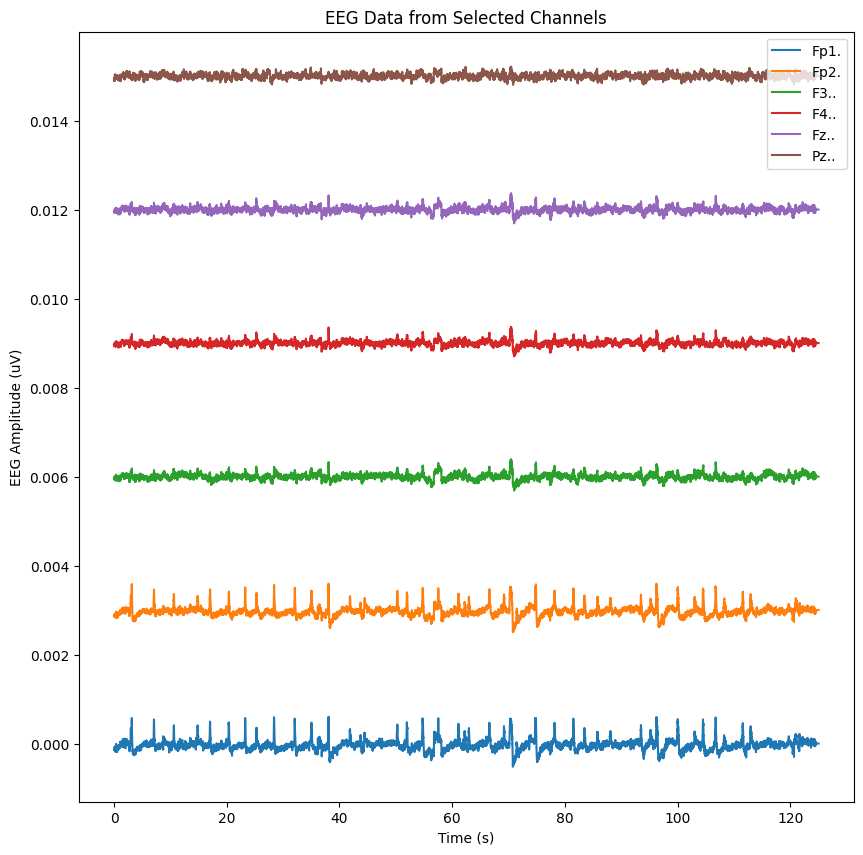

In [3]:
import matplotlib.pyplot as plt

eeg_data = raw_data.get_data()
sampling_frequency = raw_data.info["sfreq"]
n_times = eeg_data.shape[1]
selected_channels = raw_data.ch_names
time = [i/sampling_frequency for i in range(n_times)]

plt.figure(figsize=(10, 10))

for index, channel in enumerate(selected_channels) :
    plt.plot(time, eeg_data[index] + index * 0.003, label = channel)

plt.xlabel('Time (s)')
plt.ylabel('EEG Amplitude (uV)')
plt.title('EEG Data from Selected Channels')

plt.legend(loc='upper right')

plt.show()

In [4]:
events, events_id = mne.events_from_annotations(raw_data)
print(events)
print(events_id)

Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
[[    0     0     1]
 [  672     0     3]
 [ 1328     0     1]
 [ 2000     0     2]
 [ 2656     0     1]
 [ 3328     0     2]
 [ 3984     0     1]
 [ 4656     0     3]
 [ 5312     0     1]
 [ 5984     0     3]
 [ 6640     0     1]
 [ 7312     0     2]
 [ 7968     0     1]
 [ 8640     0     2]
 [ 9296     0     1]
 [ 9968     0     3]
 [10624     0     1]
 [11296     0     2]
 [11952     0     1]
 [12624     0     3]
 [13280     0     1]
 [13952     0     3]
 [14608     0     1]
 [15280     0     2]
 [15936     0     1]
 [16608     0     2]
 [17264     0     1]
 [17936     0     3]
 [18592     0     1]
 [19264     0     2]]
{np.str_('T0'): 1, np.str_('T1'): 2, np.str_('T2'): 3}


In [5]:
raw_data.load_data()
raw_data.filter(1., 40., fir_design='firwin')
epochs = mne.Epochs(raw_data, events, event_id=events_id, tmin=-0.2, tmax=0.8, baseline=(None, 0), preload=True)
epochs.drop_bad()
print(epochs)
print(epochs.events)

Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 529 samples (3.306 s)

Not setting metadata
30 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 30 events and 161 original time points ...
1 bad epochs dropped
<Epochs | 29 events (all good), -0.2 – 0.8 s (baseline -0.2 – 0 s), ~229 kB, data loaded,
 np.str_('T0'): 14
 np.str_('T1'): 

In [6]:
import torch
from torch.utils.data import DataLoader, TensorDataset, BatchSampler, RandomSampler
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
raw_data2 = mne.io.read_raw_edf('S001R04.edf')
raw_data3 = mne.io.read_raw_edf('S001R05.edf')
raw_data4 = mne.io.read_raw_edf('S001R06.edf')
raw_data5 = mne.io.read_raw_edf('S001R07.edf')
raw_data6 = mne.io.read_raw_edf('S001R08.edf')
raw_data7 = mne.io.read_raw_edf('S001R09.edf')
rawdatas = [raw_data2, raw_data3, raw_data4, raw_data5, raw_data6, raw_data7]
eeg_data = epochs.get_data()
for raw in rawdatas :
    print(raw)
    raw.pick(['Fp1.', 'Fp2.', 'F3..', 'F4..', 'Fz..', 'Pz..'])
    events, events_id = mne.events_from_annotations(raw)
    raw.load_data()
    epoch = mne.Epochs(raw, events, events_id, tmin=-0.2, tmax=0.8, baseline=(None, 0), preload=True)
    np.concat((eeg_data, epoch.get_data()), 0)

shape = eeg_data.shape
scaler = scaler.fit(eeg_data.reshape(-1, eeg_data.shape[-1]))
eeg_data = scaler.transform(eeg_data.reshape(-1, eeg_data.shape[-1])).reshape(shape)
print(eeg_data.shape)
eeg_events = epochs.events[:, -1] - 1

eeg_tensor = torch.tensor(eeg_data, dtype=torch.float32)
label_tensor = torch.tensor(eeg_events, dtype=torch.long)

dataset = TensorDataset(eeg_tensor, label_tensor)
sampler = BatchSampler(RandomSampler(dataset, replacement=True, num_samples=50 * len(dataset)), batch_size=32, drop_last=True)
train_loader = DataLoader(dataset, batch_sampler=sampler)
print(dataset)

Extracting EDF parameters from c:\Users\aryas\OneDrive\Desktop\Brain Computing\notebooks\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\aryas\OneDrive\Desktop\Brain Computing\notebooks\S001R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\aryas\OneDrive\Desktop\Brain Computing\notebooks\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\aryas\OneDrive\Desktop\Brain Computing\notebooks\S001R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\aryas\OneDrive\Desktop\Brain Computing\notebooks\S001R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\aryas\OneDrive\Desktop\Br

In [ ]:
from torch import nn, optim

class NeuralNetwork(nn.Module):
    def __init__(self, num_classes, seq_len=161):
        super().__init__()
        
        self.seq_len = seq_len
        
        self.conv1 = nn.Conv1d(in_channels=6, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(2560, 512)
        self.fc2 = nn.Linear(512, 120)
        self.drop = nn.Dropout(0.3)
        
        self.rnn = nn.LSTM(input_size=6, hidden_size=64, num_layers=5, batch_first=True)
        
        self.encoder = nn.Linear(184, 100)
        self.decoder = nn.Linear(100, 184)
        
        # Classification
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, num_classes)
        
    def forward(self, x):
        batch_size = x.size(0)
        x_cnn = self.pool1(self.drop(torch.relu(self.conv1(x))))
        x_cnn = self.pool2(self.drop(torch.relu(self.conv2(x_cnn))))
        cnn_feature = x_cnn.view(batch_size, -1)
        cnn_feature = torch.relu(self.fc1(cnn_feature))
        cnn_feature = torch.relu(self.fc2(cnn_feature))
        
        x_rnn = x.permute(0, 2, 1)
        rnn_out, _ = self.rnn(x_rnn)
        rnn_feature = rnn_out[:, -1, :] 
        combined_feature = torch.cat((rnn_feature, cnn_feature), dim=1)
        encoded = torch.relu(self.encoder(combined_feature))
        decoded = torch.relu(self.decoder(encoded))
        output = self.drop(self.fc3(rnn_feature))
        output = self.fc4(output)
        return output

In [8]:
n_classes = 3
model = NeuralNetwork(n_classes)

loss_fn = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters(),lr=1e-3)

In [ ]:
from sklearn.metrics import accuracy_score
epochs = 50

for epoch in range(epochs) :
    running_loss = 0
    all_preds = []
    all_labels = []
    for batch, label in train_loader :
        optimiser.zero_grad()
        outputs = model(batch)
        _, pred = torch.max(outputs, 1)
        all_preds.extend(pred.numpy())
        all_labels.extend(label.numpy())
        loss = loss_fn(outputs, label)
        loss.backward()
        optimiser.step()

        running_loss += loss.item()
    accuracy = accuracy_score(all_labels, all_preds)
    print(f'Epoch - {epoch} : Loss - {running_loss/len(train_loader): .4f}')
    print(f"Epoch {epoch + 1}/{epochs} - Loss: {running_loss / len(train_loader):.4f} - Accuracy: {accuracy:.4f}")


torch.Size([32, 6, 161])
torch.Size([32, 6, 161])
torch.Size([32, 32, 80])
torch.Size([32, 64, 40])
torch.Size([32, 2560])
torch.Size([32, 120])
torch.Size([32, 161, 6])
torch.Size([32, 64])
torch.Size([32, 184])
1 torch.Size([32, 100])
torch.Size([32, 100])
torch.Size([32, 3])
torch.Size([32, 3])
torch.Size([32])
torch.Size([32, 6, 161])
torch.Size([32, 6, 161])
torch.Size([32, 32, 80])
torch.Size([32, 64, 40])
torch.Size([32, 2560])
torch.Size([32, 120])
torch.Size([32, 161, 6])
torch.Size([32, 64])
torch.Size([32, 184])
1 torch.Size([32, 100])
torch.Size([32, 100])
torch.Size([32, 3])
torch.Size([32, 3])
torch.Size([32])
torch.Size([32, 6, 161])
torch.Size([32, 6, 161])
torch.Size([32, 32, 80])
torch.Size([32, 64, 40])
torch.Size([32, 2560])
torch.Size([32, 120])
torch.Size([32, 161, 6])
torch.Size([32, 64])
torch.Size([32, 184])
1 torch.Size([32, 100])
torch.Size([32, 100])
torch.Size([32, 3])
torch.Size([32, 3])
torch.Size([32])
torch.Size([32, 6, 161])
torch.Size([32, 6, 161])
to

In [ ]:
from torch import load, save
with open('model_state.pt', 'wb') as file :
    save(model.state_dict(), file)


In [ ]:
with open('model_state.pt', 'rb') as file :
    model.load_state_dict(load(file))

raw = mne.io.read_raw_edf('S001R09.edf')
raw.pick(['Fp1.', 'Fp2.', 'F1..', 'F2..', 'Fz..', 'Pz..'])
print(raw)
events, events_id = mne.events_from_annotations(raw)
raw.load_data()
raw.filter(1., 40., fir_design='firwin')
epochs = mne.Epochs(raw, events, event_id=events_id, tmin=-0.2, tmax=0.8, baseline=(None, 0), preload=True)
epochs.drop_bad()
print(epochs)
print(epochs.events)

Extracting EDF parameters from c:\Users\aryas\OneDrive\Desktop\Brain Computing\S001R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<RawEDF | S001R09.edf, 6 x 20000 (125.0 s), ~10 kB, data not loaded>
Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 529 samples (3.306 s)

Not setting metadata
30 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 30 events and 161 original time points ...


C:\Users\aryas\AppData\Local\Temp\ipykernel_7612\2384352405.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(load(file))


In [ ]:
eeg_data = epochs.get_data()
eeg_data = scaler.transform(eeg_data.reshape(-1, eeg_data.shape[-1])).reshape(eeg_data.shape)
eeg_events = epochs.events[:, -1] - 1

eeg_tensor = torch.tensor(eeg_data, dtype=torch.float32)
label_tensor = torch.tensor(eeg_events, dtype=torch.long)

dataset = TensorDataset(eeg_tensor, label_tensor)
test_loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)
print(dataset)

In [ ]:
with torch.no_grad() :
    model.eval()
    for batch, label in test_loader :
        outputs = model(batch)
        print(outputs)       
        _, outputs = torch.max(outputs, axis=1)
        print(torch.vstack((label, outputs)))
        print(len(label[label != outputs]))
        print(len(label[label == outputs]))
    

torch.Size([29, 161, 6])
torch.Size([29, 64])
torch.Size([29, 3])
tensor([[ 2.8746, -1.7502, -0.7568],
        [-1.7181,  0.9891,  0.4678],
        [ 2.8750, -1.7504, -0.7568],
        [-0.2494,  0.0732,  0.1066],
        [-1.5747,  0.8994,  0.4290],
        [ 2.8231, -1.7222, -0.7424],
        [ 2.9281, -1.7771, -0.7737],
        [-1.6700,  0.9629,  0.4533],
        [ 2.8892, -1.7570, -0.7622],
        [-1.6986,  0.9759,  0.4636],
        [-1.7080,  0.9823,  0.4656],
        [-1.7126,  0.9854,  0.4666],
        [ 2.9135, -1.7694, -0.7694],
        [-1.6439,  0.9495,  0.4454],
        [-1.4937,  0.8635,  0.3963],
        [ 2.9633, -1.7943, -0.7856],
        [ 2.9168, -1.7705, -0.7715],
        [-1.6383,  0.9332,  0.4500],
        [ 2.4976, -1.5595, -0.6378],
        [-1.5705,  0.8947,  0.4286],
        [ 2.1896, -1.3904, -0.5547],
        [ 2.8828, -1.7533, -0.7603],
        [ 2.4480, -1.5297, -0.6294],
        [-1.6246,  0.9342,  0.4415],
        [ 2.7869, -1.7059, -0.7293],
        [

In [ ]:
print(model)

NeuralNetwork(
  (conv1): Conv1d(6, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2560, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=120, bias=True)
  (drop): Dropout(p=0.5, inplace=False)
  (rnn): LSTM(6, 64, num_layers=5, batch_first=True)
  (encoder): Linear(in_features=184, out_features=100, bias=True)
  (decoder): Linear(in_features=100, out_features=184, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=3, bias=True)
)
